<a href="https://colab.research.google.com/github/MurariPavanSai/Liver-Cirrhosis-Prediction/blob/main/Liver_Cirrhosis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading a File

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
import numpy as np

import pandas as pd

a=pd.read_excel("HealthCareData.xlsx")
a.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


# Checking for null values

In [ ]:
a.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

# Preprocessing

In [ ]:
a.drop(['S.NO', 'Place(location where the patient lives)'], axis=1, inplace=True)

In [ ]:
a['Family history of cirrhosis/ hereditary'].unique()

array(['no', 'yes', 'husband'], dtype=object)

In [ ]:
a.loc[a['Family history of cirrhosis/ hereditary'] == 'husband', 'Family history of cirrhosis/ hereditary'] = 'no'
a['Family history of cirrhosis/ hereditary'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
a.dropna(subset=['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'], inplace=True)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 949
Data columns (total 40 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      896 non-null    int64  
 1   Gender                                                                   896 non-null    object 
 2   Duration of alcohol consumption(years)                                   896 non-null    int64  
 3   Quantity of alcohol consumption (quarters/day)                           896 non-null    int64  
 4   Type of alcohol consumed                                                 896 non-null    object 
 5   Hepatitis B infection                                                    896 non-null    object 
 6   Hepatitis C infection                                                    8

In [ ]:
a.corr()

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
Age,1.000000,0.506138,0.156070,0.082781,0.093201,0.003425,0.051136,0.087628,0.037833,0.068185,...,-0.287094,0.112847,0.041163,0.251940,0.054826,-0.020440,0.018559,0.130734,0.045700,0.121997
Duration of alcohol consumption(years),0.506138,1.000000,0.238452,0.254558,0.146707,-0.070880,0.002455,-0.022703,0.265482,-0.004637,...,-0.094032,0.080178,-0.125596,0.058265,-0.142593,-0.072478,-0.052080,0.325115,0.282533,0.217465
Quantity of alcohol consumption (quarters/day),0.156070,0.238452,1.000000,0.073272,0.049529,-0.084186,0.023113,-0.157402,0.003908,0.049195,...,-0.091452,0.329538,-0.039949,0.044936,-0.075329,-0.038621,-0.076943,0.125615,0.015662,-0.006411
TCH,0.082781,0.254558,0.073272,1.000000,-0.224013,0.043991,0.022116,-0.112437,0.421748,-0.128062,...,-0.041343,0.047398,-0.146064,-0.132320,0.007632,0.116037,-0.148824,0.240584,0.053985,-0.171262
HDL,0.093201,0.146707,0.049529,-0.224013,1.000000,-0.066420,-0.099627,-0.061585,-0.097521,0.001254,...,-0.084776,-0.040388,0.151597,0.056558,0.058148,0.069933,0.019835,-0.084603,0.008537,0.006526
Hemoglobin (g/dl),0.003425,-0.070880,-0.084186,0.043991,-0.066420,1.000000,-0.014048,0.079273,-0.016722,0.010232,...,0.043430,-0.004028,0.005302,0.007536,0.037462,0.032445,0.011776,-0.015576,-0.011383,-0.047816
PCV (%),0.051136,0.002455,0.023113,0.022116,-0.099627,-0.014048,1.000000,0.644910,-0.198942,0.126489,...,-0.233071,-0.051362,0.123306,-0.226535,0.279328,0.186290,0.134083,0.013957,-0.153341,-0.144153
RBC (million cells/microliter),0.087628,-0.022703,-0.157402,-0.112437,-0.061585,0.079273,0.644910,1.000000,-0.396540,0.234540,...,-0.121149,0.407220,-0.238144,-0.162263,0.133035,0.321820,-0.106379,-0.289947,0.034858,0.150434
MCV (femtoliters/cell),0.037833,0.265482,0.003908,0.421748,-0.097521,-0.016722,-0.198942,-0.396540,1.000000,0.219517,...,0.131570,-0.063501,-0.197553,-0.041429,-0.191222,0.010149,-0.125941,-0.062404,0.286994,0.243668
MCH (picograms/cell),0.068185,-0.004637,0.049195,-0.128062,0.001254,0.010232,0.126489,0.234540,0.219517,1.000000,...,-0.281014,0.316969,-0.376839,-0.307774,0.234118,0.237889,0.059341,-0.316872,0.170753,0.283048


In [ ]:
a.drop(['RBC  (million cells/microliter)'], axis=1, inplace=True)

In [ ]:
tchM=a['TCH'].mean()
a['TCH'] = a['TCH'].fillna(tchM)

l=[]
for x in a['TG']:
    if(type(x)==str):
        print(x)
l

130LDL


[]

In [ ]:
a['TG'][588]=130
a['TG']=a['TG'].fillna(a['TG'].mean())

l=[]
for x in a['LDL']:
    if(type(x)==str):
        print(x)
l

HDL


<ipython-input-13-d8a714d83af4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TG'][588]=130


[]

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 949
Data columns (total 39 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      896 non-null    int64  
 1   Gender                                                                   896 non-null    object 
 2   Duration of alcohol consumption(years)                                   896 non-null    int64  
 3   Quantity of alcohol consumption (quarters/day)                           896 non-null    int64  
 4   Type of alcohol consumed                                                 896 non-null    object 
 5   Hepatitis B infection                                                    896 non-null    object 
 6   Hepatitis C infection                                                    8

In [ ]:
a.drop(['MCHC  (grams/deciliter)', 'MCH  (picograms/cell)'], axis=1, inplace=True)

In [ ]:
a['LDL'][588]=np.nan
a['LDL']=a['LDL'].fillna(a['LDL'].mean())
a['HDL']=a['HDL'].fillna(a['HDL'].mean())
a['PCV  (%)']=a['PCV  (%)'].fillna(a['PCV  (%)'].mean())
a.drop(['A/G Ratio'], axis=1, inplace=True)
a.loc[a['Gender'] == 'female ', 'Gender'] = 'female'
# Remove trailing whitespaces in comparison and assignment
a.loc[a['Gender'].str.strip() == 'female', 'Gender'] = 1
a.loc[a['Gender'].str.strip() == 'male', 'Gender'] = 2
a.loc[a['Gender'].str.strip() == 'transgender', 'Gender'] = 3

# Check the updated unique values
print(a['Gender'].unique())


[2 1 3]


<ipython-input-16-9d4599cc41a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['LDL'][588]=np.nan


In [ ]:
a['Gender'] = a['Gender'].astype(int)
a.loc[a['Type of alcohol consumed'].str.strip() == 'branded liquor', 'Type of alcohol consumed'] = 1
a.loc[a['Type of alcohol consumed'].str.strip() == 'both', 'Type of alcohol consumed'] = 3
a.loc[a['Type of alcohol consumed'].str.strip() == 'country liquor', 'Type of alcohol consumed'] = 2
a['Type of alcohol consumed'] = a['Type of alcohol consumed'].astype(int)
a.loc[a['Hepatitis B infection'].str.strip() == 'Positive', 'Hepatitis B infection'] = 1
a.loc[a['Hepatitis B infection'].str.strip() == 'positive', 'Hepatitis B infection'] = 1
a.loc[a['Hepatitis B infection'].str.strip() == 'negative', 'Hepatitis B infection'] = 0

a['Hepatitis B infection'] = a['Hepatitis B infection'].astype(int)

a.loc[a['Hepatitis C infection'].str.strip() == 'Positive', 'Hepatitis C infection'] = 1
a.loc[a['Hepatitis C infection'].str.strip() == 'positive', 'Hepatitis C infection'] = 1
a.loc[a['Hepatitis C infection'].str.strip() == 'negative', 'Hepatitis C infection'] = 0

a['Hepatitis C infection'] = a['Hepatitis C infection'].astype(int)


a.loc[a['Diabetes Result'].str.strip() == 'YES', 'Diabetes Result'] = 1
a.loc[a['Diabetes Result'].str.strip() == 'NO', 'Diabetes Result'] = 0

a['Diabetes Result'] = a['Diabetes Result'].astype(int)

In [ ]:
p=[]
q=[]
for x in a['Blood pressure (mmhg)']:
    kit=''
    kat=''
    yoyo=1
    for char in x :
        if(char=='/'):
            yoyo=0
            continue
        if(yoyo):
            kit+=char
        else :
            kat+=char
    p.append(int(kit))
    q.append(int(kat))


In [ ]:
array_p = np.array(p)
array_q = np.array(q)

bp = np.vstack((array_p, array_q)).T

bp.shape

(896, 2)

In [ ]:
a['HighBP']=array_p
a['LowBP']=array_q
a.drop(['Blood pressure (mmhg)'], axis=1, inplace=True)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 949
Data columns (total 37 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      896 non-null    int64  
 1   Gender                                                                   896 non-null    int32  
 2   Duration of alcohol consumption(years)                                   896 non-null    int64  
 3   Quantity of alcohol consumption (quarters/day)                           896 non-null    int64  
 4   Type of alcohol consumed                                                 896 non-null    int32  
 5   Hepatitis B infection                                                    896 non-null    int32  
 6   Hepatitis C infection                                                    8

In [ ]:
a.loc[a['Obesity'].str.strip() == 'yes', 'Obesity'] = 1
a.loc[a['Obesity'].str.strip() == 'no', 'Obesity'] = 0

a['Obesity'] = a['Obesity'].astype(int)
a['Obesity'].unique()



a['MCV   (femtoliters/cell)']=a['MCV   (femtoliters/cell)'].fillna(a['MCV   (femtoliters/cell)'].mean())
a['Total Count']=a['Total Count'].fillna(a['Total Count'].mean())
a['Monocytes   (%)']=a['Monocytes   (%)'].fillna(a['Monocytes   (%)'].mean())
a['Eosinophils   (%)']=a['Eosinophils   (%)'].fillna(a['Eosinophils   (%)'].mean())
a['Basophils  (%)']=a['Basophils  (%)'].fillna(a['Basophils  (%)'].mean())
a['Indirect     (mg/dl)']=a['Indirect     (mg/dl)'].fillna(a['Indirect     (mg/dl)'].mean())
a['Total Protein     (g/dl)']=a['Total Protein     (g/dl)'].fillna(a['Total Protein     (g/dl)'].mean())
a['Albumin   (g/dl)']=a['Albumin   (g/dl)'].fillna(a['Albumin   (g/dl)'].mean())
a['Globulin  (g/dl)']=a['Globulin  (g/dl)'].fillna(a['Globulin  (g/dl)'].mean())
a['AL.Phosphatase      (U/L)']=a['AL.Phosphatase      (U/L)'].fillna(a['AL.Phosphatase      (U/L)'].mean())





a.loc[a['Family history of cirrhosis/ hereditary'].str.strip() == 'yes', 'Family history of cirrhosis/ hereditary'] = 1
a.loc[a['Family history of cirrhosis/ hereditary'].str.strip() == 'no', 'Family history of cirrhosis/ hereditary'] = 0

a['Family history of cirrhosis/ hereditary'] = a['Family history of cirrhosis/ hereditary'].astype(int)
a['Family history of cirrhosis/ hereditary'].unique()


a.loc[a['Total Bilirubin    (mg/dl)'] =='o.4', 'Total Bilirubin    (mg/dl)'] = 0.4
a['Total Bilirubin    (mg/dl)'] = a['Total Bilirubin    (mg/dl)'].astype(float)

a.loc[a['USG Abdomen (diffuse liver or  not)'].str.strip() == 'YES', 'USG Abdomen (diffuse liver or  not)'] = 1
a.loc[a['USG Abdomen (diffuse liver or  not)'].str.strip() == 'no', 'USG Abdomen (diffuse liver or  not)'] = 0

a['USG Abdomen (diffuse liver or  not)'] = a['USG Abdomen (diffuse liver or  not)'].astype(int)



a.loc[a['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].str.strip() == 'YES', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'] = 1
a.loc[a['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].str.strip() == 'no', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'] = 0

a['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'] = a['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].astype(int)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 949
Data columns (total 37 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      896 non-null    int64  
 1   Gender                                                                   896 non-null    int32  
 2   Duration of alcohol consumption(years)                                   896 non-null    int64  
 3   Quantity of alcohol consumption (quarters/day)                           896 non-null    int64  
 4   Type of alcohol consumed                                                 896 non-null    int32  
 5   Hepatitis B infection                                                    896 non-null    int32  
 6   Hepatitis C infection                                                    8

# Preprocissing is Done!!

In [ ]:
X=a.drop(['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],axis=1)
y=a.iloc[:,34]


X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 949
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             896 non-null    int64  
 1   Gender                                          896 non-null    int32  
 2   Duration of alcohol consumption(years)          896 non-null    int64  
 3   Quantity of alcohol consumption (quarters/day)  896 non-null    int64  
 4   Type of alcohol consumed                        896 non-null    int32  
 5   Hepatitis B infection                           896 non-null    int32  
 6   Hepatitis C infection                           896 non-null    int32  
 7   Diabetes Result                                 896 non-null    int32  
 8   Obesity                                         896 non-null    int32  
 9   Family history of cirrhosis/ hereditary    

In [ ]:
X.head()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),HighBP,LowBP
0,55,2,12,2,1,0,0,1,1,0,...,3.0,6.0,3.0,4.0,150.0,56,34,1,138,90
1,55,2,12,2,1,0,0,1,1,0,...,3.0,6.0,3.0,4.0,150.0,56,34,1,138,90
2,55,2,12,2,1,0,0,1,0,0,...,3.0,6.0,3.0,4.0,150.0,56,34,1,138,90
3,55,2,12,2,1,0,0,0,0,0,...,3.0,6.0,3.0,4.0,150.0,56,34,1,138,90
4,55,1,12,2,1,0,0,1,0,0,...,3.0,6.0,3.0,4.0,150.0,56,34,1,138,90


In [ ]:
y=y.to_frame()

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
y

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1
1,1
2,1
3,1
4,1
...,...
945,0
946,0
947,0
948,0


In [ ]:
a.loc[a['Platelet Count  (lakhs/mm)'] == 90000, 'Platelet Count  (lakhs/mm)'] = 0.9

# Outliers

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\si

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\si

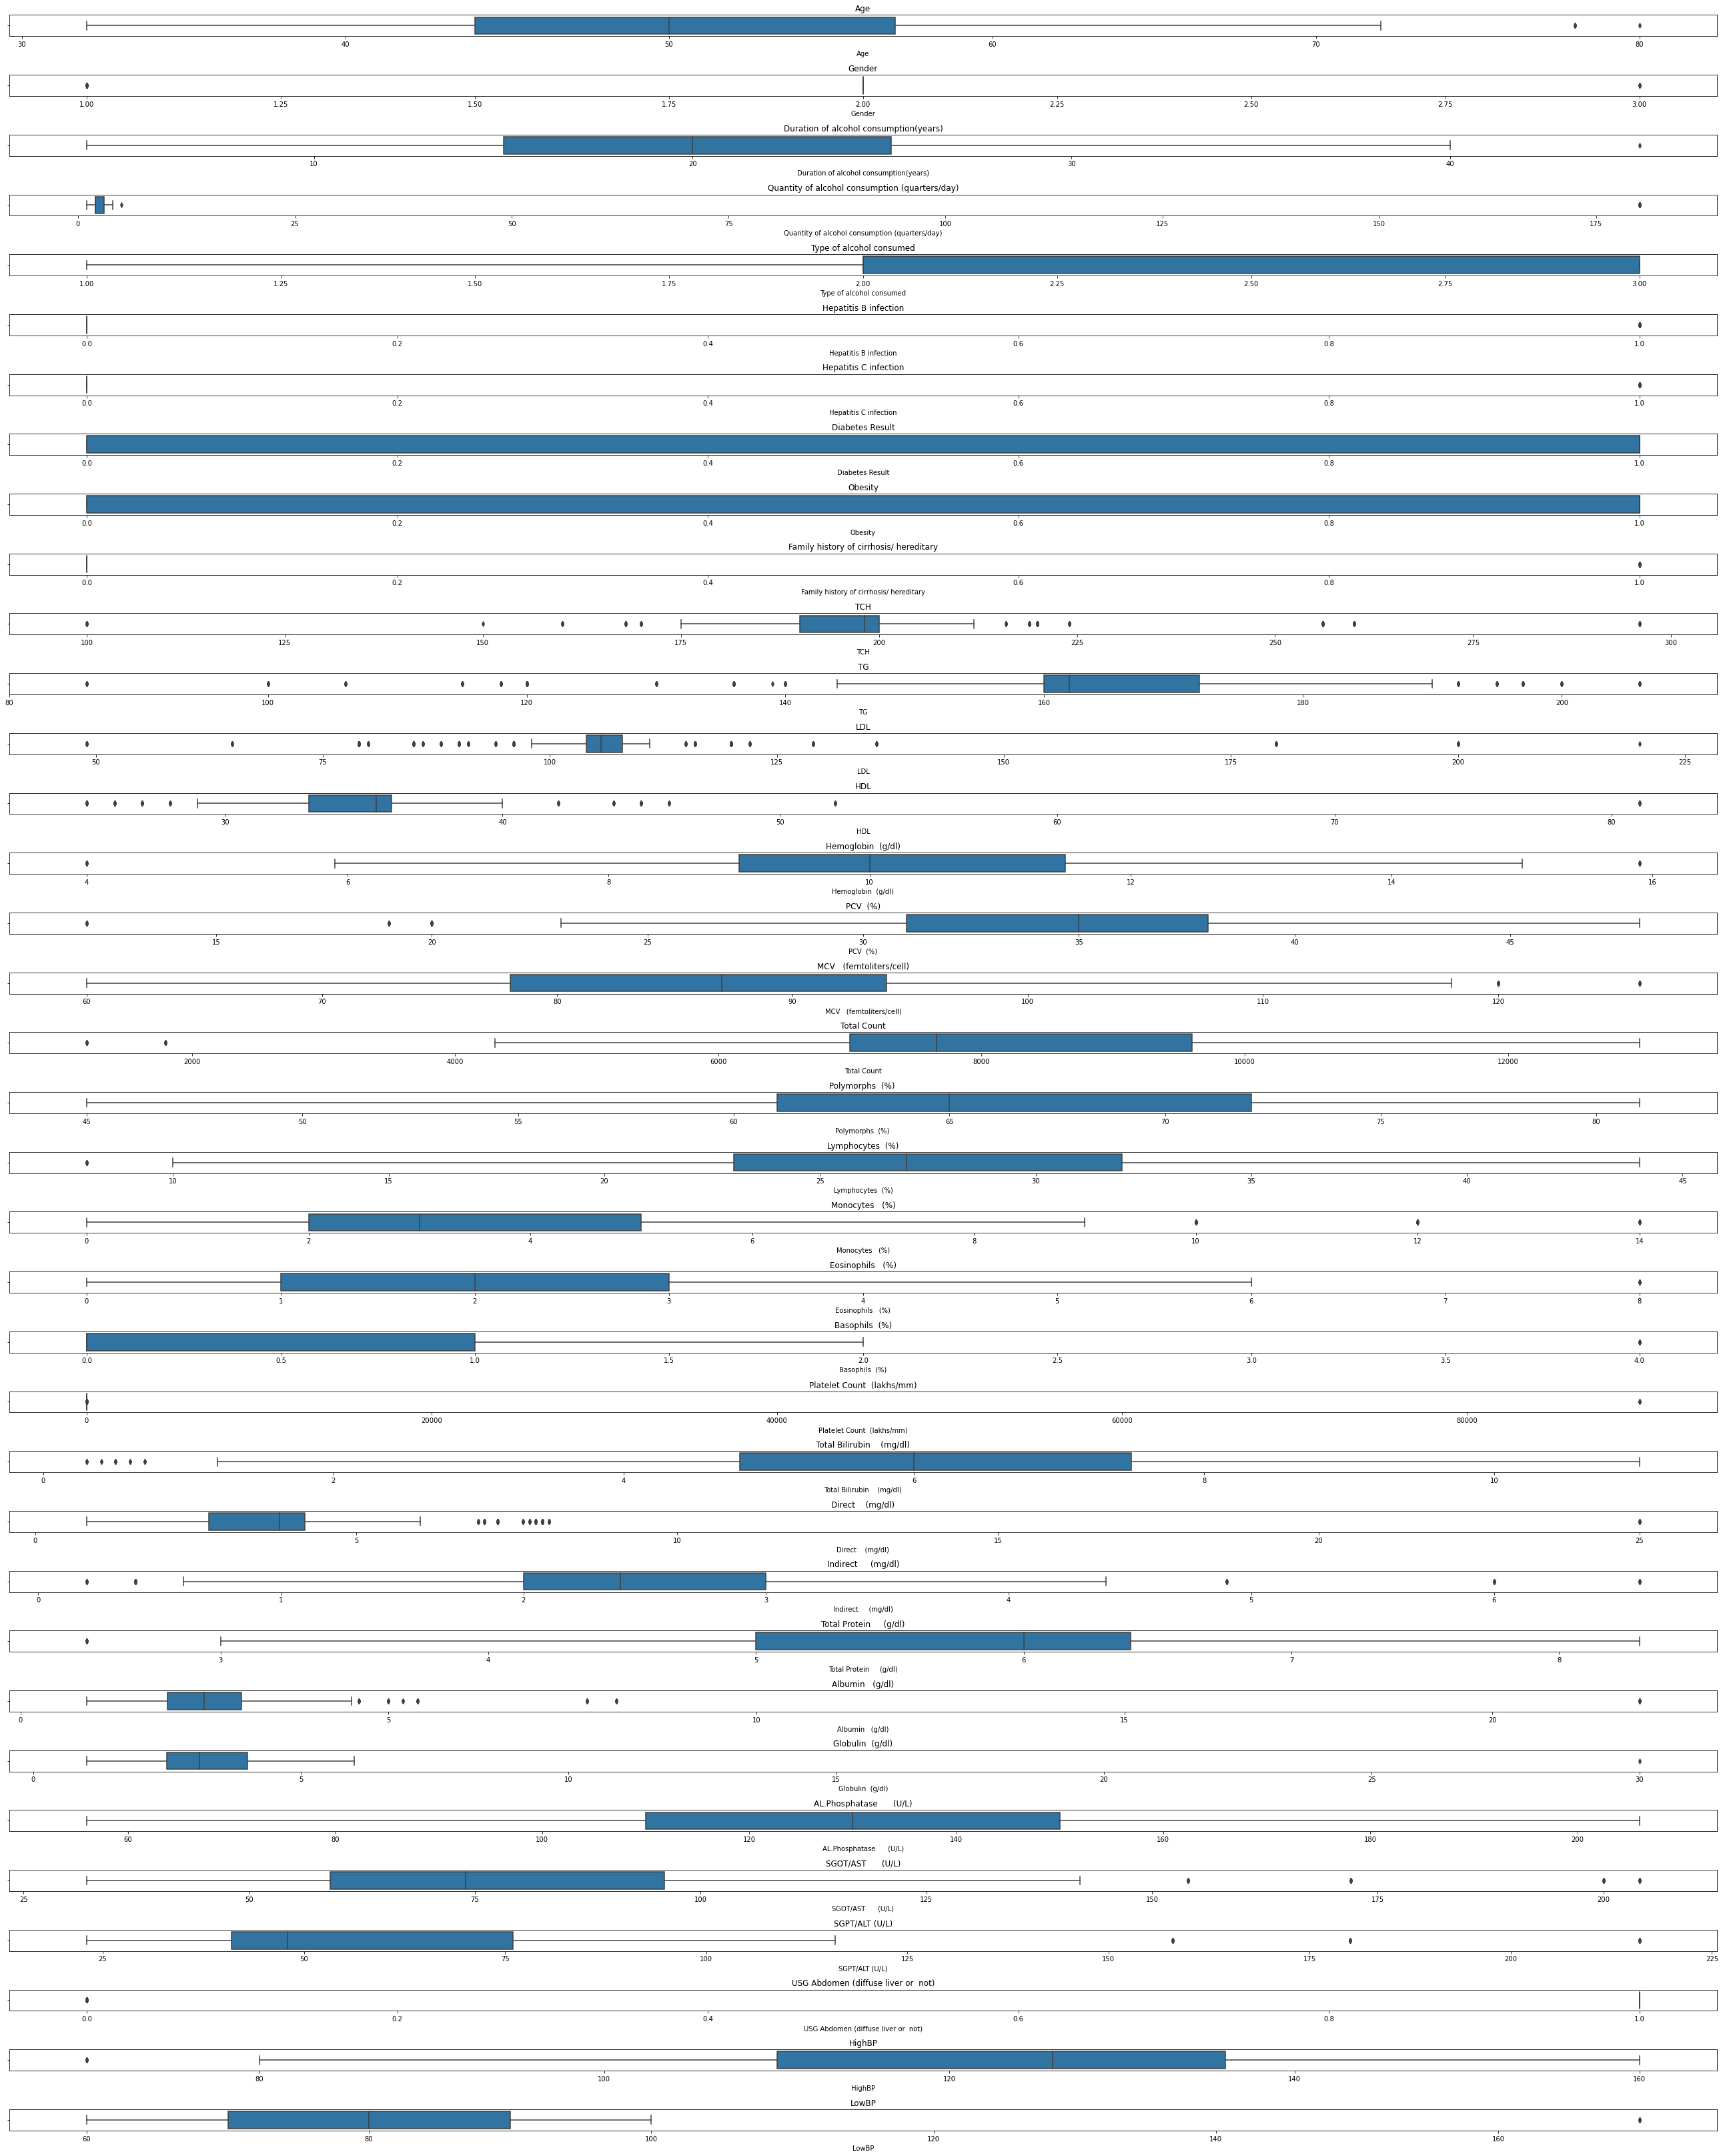

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(nrows=len(X.columns), figsize=(36, 45))

# Iterate over each column
for i, column in enumerate(X.columns):
    # Plot boxplot
    sns.boxplot(X[column], ax=axs[i])
    axs[i].set_title(column)  # Set title for each subplot

# Adjust spacing between subplots
plt.tight_layout()

# Show the final image
plt.show()


In [ ]:

def treat_outliers(df, columns, threshold=1.5):
    treated_df = df.copy()

    for column in columns:
        # Calculate the IQR (Interquartile Range)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Treat outliers by capping them at the bounds
        treated_df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return treated_df

# Example usage
# Create a sample DataFrame

df = X

# Select columns to treat outliers
columns_to_treat = ['Age',
 'Duration of alcohol consumption(years)',
 'Quantity of alcohol consumption (quarters/day)',
 'Type of alcohol consumed',
 'Diabetes Result',
 'Obesity',
 'TCH',
 'TG',
 'LDL',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'MCV   (femtoliters/cell)',
 'Total Count',
 'Polymorphs  (%) ',
 'Lymphocytes  (%)',
 'Monocytes   (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Platelet Count  (lakhs/mm)',
 'Total Bilirubin    (mg/dl)',
 'Direct    (mg/dl)',
 'Indirect     (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'Globulin  (g/dl)',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)',
 'SGPT/ALT (U/L)',
 'HighBP',
 'LowBP']

# Treat outliers using the IQR method
treated_df = treat_outliers(df, columns_to_treat, threshold=1.5)

# Print the original and treated DataFrame
print("Original DataFrame:")
print(df)
print("\nTreated DataFrame:")
print(treated_df)


Original DataFrame:
     Age  Gender  Duration of alcohol consumption(years)  \
0     55       2                                      12   
1     55       2                                      12   
2     55       2                                      12   
3     55       2                                      12   
4     55       1                                      12   
..   ...     ...                                     ...   
945   54       1                                       5   
946   72       1                                       4   
947   47       2                                       7   
948   54       1                                       9   
949   52       2                                       8   

     Quantity of alcohol consumption (quarters/day)  Type of alcohol consumed  \
0                                                 2                         1   
1                                                 2                         1   
2               

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\si

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\si

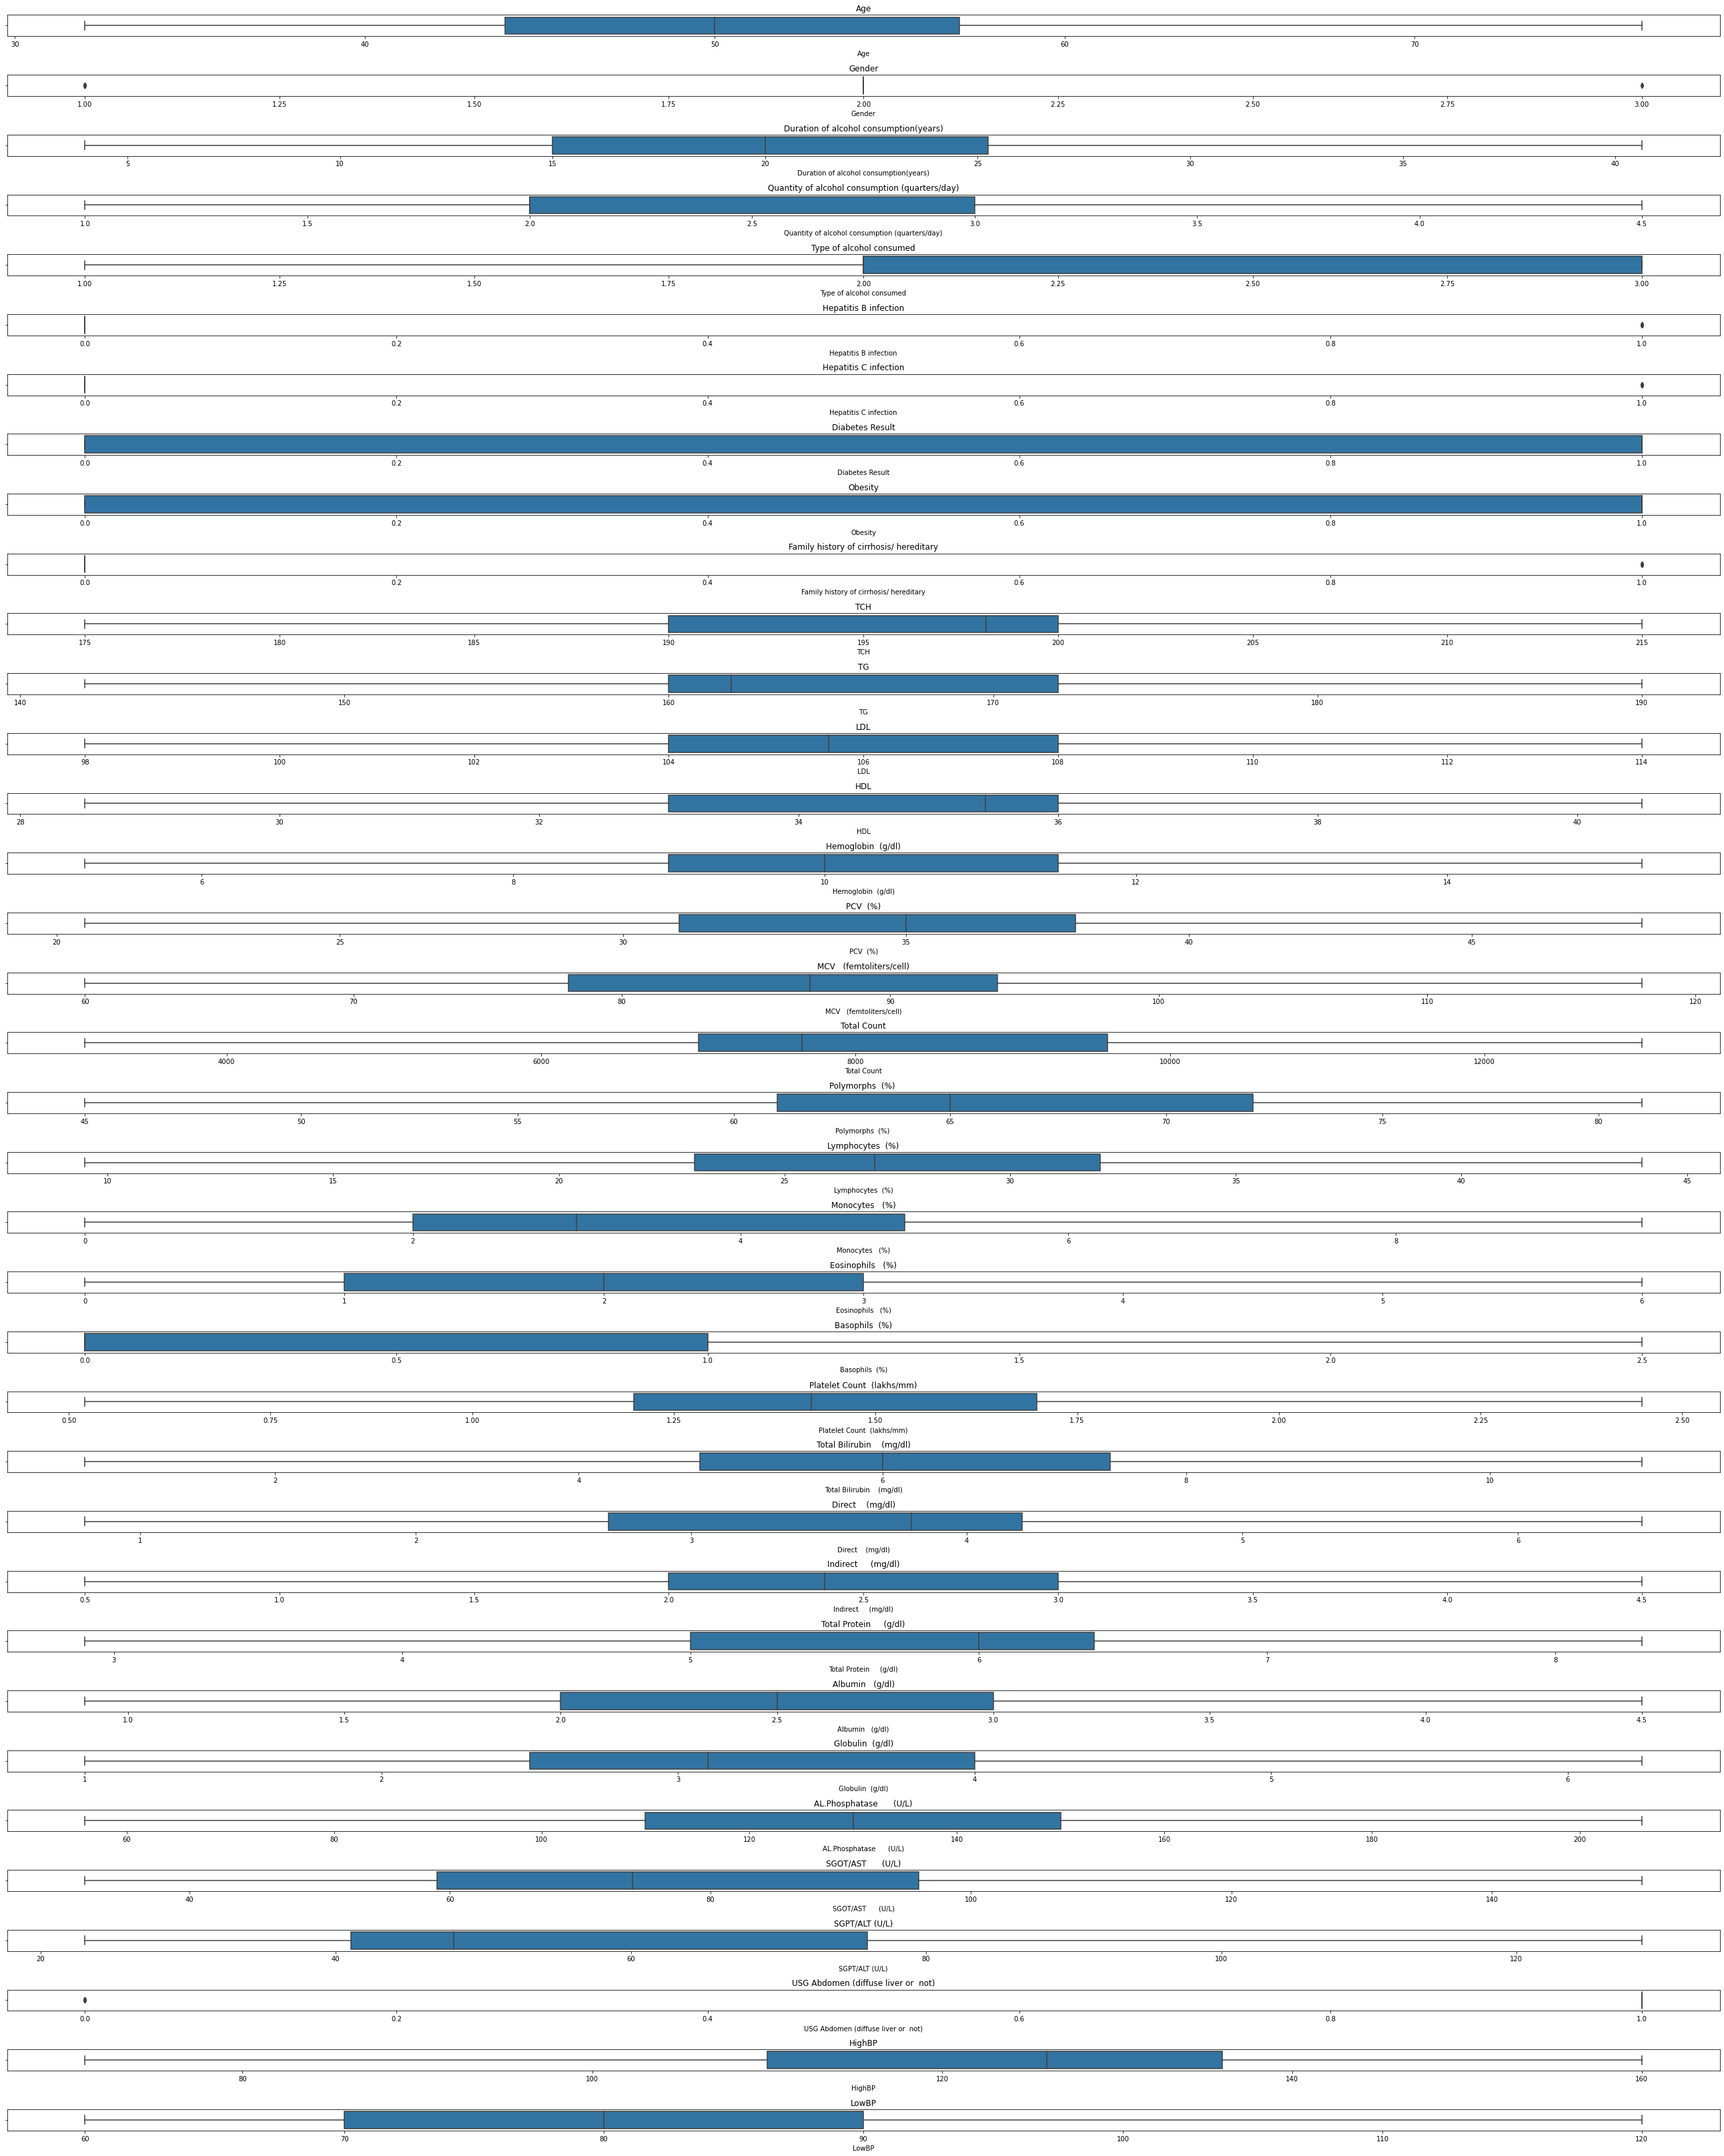

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(nrows=len(treated_df.columns), figsize=(36, 45))

# Iterate over each column
for i, column in enumerate(X.columns):
    # Plot boxplot
    sns.boxplot(treated_df[column], ax=axs[i])
    axs[i].set_title(column)  # Set title for each subplot

# Adjust spacing between subplots
plt.tight_layout()

# Show the final image
plt.show()


In [ ]:
X=treated_df
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 949
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             896 non-null    float64
 1   Gender                                          896 non-null    int32  
 2   Duration of alcohol consumption(years)          896 non-null    float64
 3   Quantity of alcohol consumption (quarters/day)  896 non-null    float64
 4   Type of alcohol consumed                        896 non-null    int32  
 5   Hepatitis B infection                           896 non-null    int32  
 6   Hepatitis C infection                           896 non-null    int32  
 7   Diabetes Result                                 896 non-null    int32  
 8   Obesity                                         896 non-null    int32  
 9   Family history of cirrhosis/ hereditary    

In [ ]:
y

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1
1,1
2,1
3,1
4,1
...,...
945,0
946,0
947,0
948,0


In [ ]:
import seaborn as sns

In [ ]:
print(a.columns)


Index(['Age', 'Gender', 'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Obesity',
       'Family history of cirrhosis/ hereditary', 'TCH', 'TG', 'LDL', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'MCV   (femtoliters/cell)',
       'Total Count', 'Polymorphs  (%) ', 'Lymphocytes  (%)',
       'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)',
       'Platelet Count  (lakhs/mm)', 'Total Bilirubin    (mg/dl)',
       'Direct    (mg/dl)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)',
       'Albumin   (g/dl)', 'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)',
       'HighBP', 'LowBP'],
      dtype='object')


<AxesSubplot:xlabel='Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', ylabel='count'>

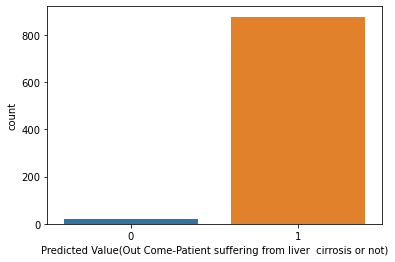

In [ ]:
sns.countplot(x= a['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'])

# We need to do balancing
# There are more YES in output than NO

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix and 'y' is your target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
0                                                                          876
1                                                                          876
dtype: int64


In [ ]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             1752 non-null   float64
 1   Gender                                          1752 non-null   int32  
 2   Duration of alcohol consumption(years)          1752 non-null   float64
 3   Quantity of alcohol consumption (quarters/day)  1752 non-null   float64
 4   Type of alcohol consumed                        1752 non-null   int32  
 5   Hepatitis B infection                           1752 non-null   int32  
 6   Hepatitis C infection                           1752 non-null   int32  
 7   Diabetes Result                                 1752 non-null   int32  
 8   Obesity                                         1752 non-null   int32  
 9   Family history of cirrhosis/ hereditary  

In [ ]:
X_resampled['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']=y_resampled

In [ ]:
X_resampled.corr()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,...,Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),HighBP,LowBP,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
Age,1.000000,-0.114007,0.263856,-0.011587,-0.089442,-0.109937,-0.104521,-0.002968,0.052873,0.059533,...,-0.075201,-0.003358,0.103297,0.104547,0.038453,0.084591,-0.005744,-0.028176,0.036967,-0.008608
Gender,-0.114007,1.000000,0.374706,-0.123363,0.007792,-0.400261,-0.401080,0.382488,0.342371,-0.065163,...,-0.123626,-0.374444,0.129924,0.054590,-0.314059,-0.277538,0.431998,0.304657,0.220370,0.447158
Duration of alcohol consumption(years),0.263856,0.374706,1.000000,-0.422350,0.300096,-0.301055,-0.313151,0.522312,0.428974,-0.097212,...,-0.290087,-0.711751,0.195449,0.594296,-0.321144,-0.089468,0.771159,0.263735,0.256592,0.779106
Quantity of alcohol consumption (quarters/day),-0.011587,-0.123363,-0.422350,1.000000,-0.281625,0.133416,0.157820,-0.452432,-0.378675,0.217377,...,0.037997,0.446095,-0.318237,-0.471215,0.342612,0.130405,-0.616049,-0.270850,-0.169523,-0.606601
Type of alcohol consumed,-0.089442,0.007792,0.300096,-0.281625,1.000000,0.108851,0.106549,0.248543,0.220187,-0.200737,...,0.067119,-0.259057,0.196159,0.361049,-0.190652,-0.060604,0.296141,0.194977,0.268549,0.326546
Hepatitis B infection,-0.109937,-0.400261,-0.301055,0.133416,0.108851,1.000000,0.978856,-0.341491,-0.351284,-0.055625,...,0.149354,0.343810,-0.365556,-0.056536,0.328384,0.196119,-0.399248,-0.263074,-0.285713,-0.414352
Hepatitis C infection,-0.104521,-0.401080,-0.313151,0.157820,0.106549,0.978856,1.000000,-0.371352,-0.379516,-0.048325,...,0.166976,0.354813,-0.369701,-0.082041,0.368490,0.201120,-0.422698,-0.271620,-0.290925,-0.437476
Diabetes Result,-0.002968,0.382488,0.522312,-0.452432,0.248543,-0.341491,-0.371352,1.000000,0.753307,-0.175483,...,-0.078044,-0.505191,0.317300,0.576170,-0.610071,-0.350010,0.732995,0.511887,0.530769,0.739146
Obesity,0.052873,0.342371,0.428974,-0.378675,0.220187,-0.351284,-0.379516,0.753307,1.000000,-0.158512,...,0.074723,-0.361696,0.357298,0.529884,-0.615774,-0.386992,0.646190,0.540752,0.560400,0.655010
Family history of cirrhosis/ hereditary,0.059533,-0.065163,-0.097212,0.217377,-0.200737,-0.055625,-0.048325,-0.175483,-0.158512,1.000000,...,-0.107387,0.104057,-0.017211,-0.202900,0.165480,0.108841,-0.176360,-0.223201,-0.206085,-0.180556


In [ ]:
data = X_resampled.drop(['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             1752 non-null   float64
 1   Gender                                          1752 non-null   int32  
 2   Duration of alcohol consumption(years)          1752 non-null   float64
 3   Quantity of alcohol consumption (quarters/day)  1752 non-null   float64
 4   Type of alcohol consumed                        1752 non-null   int32  
 5   Hepatitis B infection                           1752 non-null   int32  
 6   Hepatitis C infection                           1752 non-null   int32  
 7   Diabetes Result                                 1752 non-null   int32  
 8   Obesity                                         1752 non-null   int32  
 9   Family history of cirrhosis/ hereditary  

# Lets check our dat with different classifiers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, y_resampled, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Iterate over the classifiers and train/evaluate them
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print("Training and evaluating", classifier_name)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    print("---------------------------------------")


Training and evaluating LogisticRegression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating DecisionTreeClassifier
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating SVC


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Accuracy: 0.7207977207977208
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       169
           1       1.00      0.46      0.63       182

    accuracy                           0.72       351
   macro avg       0.82      0.73      0.70       351
weighted avg       0.82      0.72      0.70       351

---------------------------------------
Training and evaluating RandomForestClassifier


<ipython-input-43-adb8430e2761>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating KNeighborsClassifier


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------


# There are a lot features lets decrease them

In [ ]:


# Assuming 'X' is your feature matrix and 'y' is your target variable

# Create a logistic regression model (or any other estimator)
estimator = LogisticRegression()

# Specify the desired number of features to select
num_features = 20

# Create an RFE object with the logistic regression estimator and desired number of features
rfe = RFE(estimator, n_features_to_select=num_features)

# Fit the RFE model to the data
rfe.fit(data, y_resampled)

# Get the selected features from the RFE model
selected_features = rfe.support_

# Get the ranking of features from the RFE model
feature_ranking = rfe.ranking_

# Print the selected features and their rankings
for feature, rank in zip(X.columns, feature_ranking):
    print(f"Feature: {feature}, Rank: {rank}")

# Transform the data to keep only the selected features
X_selected = rfe.transform(X)


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Feature: Age, Rank: 1
Feature: Gender, Rank: 8
Feature: Duration of alcohol consumption(years), Rank: 1
Feature: Quantity of alcohol consumption (quarters/day), Rank: 1
Feature: Type of alcohol consumed, Rank: 13
Feature: Hepatitis B infection, Rank: 2
Feature: Hepatitis C infection, Rank: 1
Feature: Diabetes Result, Rank: 7
Feature: Obesity, Rank: 11
Feature: Family history of cirrhosis/ hereditary, Rank: 17
Feature: TCH, Rank: 1
Feature: TG, Rank: 5
Feature: LDL, Rank: 15
Feature: HDL, Rank: 6
Feature: Hemoglobin  (g/dl), Rank: 1
Feature: PCV  (%), Rank: 1
Feature: MCV   (femtoliters/cell), Rank: 1
Feature: Total Count, Rank: 16
Feature: Polymorphs  (%) , Rank: 1
Feature: Lymphocytes  (%), Rank: 4
Feature: Monocytes   (%), Rank: 1
Feature: Eosinophils   (%), Rank: 1
Feature: Basophils  (%), Rank: 9
Feature: Platelet Count  (lakhs/mm), Rank: 10
Feature: Total Bilirubin    (mg/dl), Rank: 1
Feature: Direct    (mg/dl), Rank: 1
Feature: Indirect     (mg/dl), Rank: 12
Feature: Total Protei

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             1752 non-null   float64
 1   Gender                                          1752 non-null   int32  
 2   Duration of alcohol consumption(years)          1752 non-null   float64
 3   Quantity of alcohol consumption (quarters/day)  1752 non-null   float64
 4   Type of alcohol consumed                        1752 non-null   int32  
 5   Hepatitis B infection                           1752 non-null   int32  
 6   Hepatitis C infection                           1752 non-null   int32  
 7   Diabetes Result                                 1752 non-null   int32  
 8   Obesity                                         1752 non-null   int32  
 9   Family history of cirrhosis/ hereditary  

In [ ]:
Fdata = data.drop(['Age', 'LowBP', 'SGPT/ALT (U/L)', 'AL.Phosphatase      (U/L)', 'Gender', 'Hepatitis B infection', 'Hepatitis C infection', 'TCH', 'TG', 'Total Count'], axis=1)


In [ ]:
y_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 1 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)  1752 non-null   int32
dtypes: int32(1)
memory usage: 7.0 KB


In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Fdata, y_resampled, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Iterate over the classifiers and train/evaluate them
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print("Training and evaluating", classifier_name)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    print("---------------------------------------")


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and evaluating LogisticRegression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating DecisionTreeClassifier
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating SVC


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9971509971509972
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       169
           1       1.00      0.99      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating RandomForestClassifier


<ipython-input-48-55684299d414>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------
Training and evaluating KNeighborsClassifier


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       182

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

---------------------------------------


# Our each classifier is too good

# there are still alot of features lets decrease to 12

In [ ]:


# Assuming 'X' is your feature matrix and 'y' is your target variable

# Select the top k features
k = 12  # Specify the number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(data, y_resampled)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Print the indices of the selected features
print("Selected feature indices:", selected_indices)

# Access the selected feature names (assuming X is a pandas DataFrame)
selected_features = X.columns[selected_indices]

# Print the names of the selected features
print("Selected features:", selected_features)


Selected feature indices: [ 2  7  8 15 17 24 25 30 31 32 33 34]
Selected features: Index(['Duration of alcohol consumption(years)', 'Diabetes Result', 'Obesity',
       'PCV  (%)', 'Total Count', 'Total Bilirubin    (mg/dl)',
       'Direct    (mg/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)',
       'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or  not)', 'HighBP'],
      dtype='object')


In [ ]:
l=[ 'Diabetes Result', 'Obesity',
       'PCV  (%)', 'Total Count', 'Total Bilirubin    (mg/dl)',
       'Direct    (mg/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)',
       'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or  not)', 'HighBP']
fewdata={}
fewdata['Duration of alcohol consumption(years)']=data['Duration of alcohol consumption(years)']
for i in l:
    fewdata[i]=data[i]

In [ ]:
type(fewdata)

dict

In [ ]:
fewdata = pd.DataFrame.from_dict(fewdata)

In [ ]:
type(fewdata)

pandas.core.frame.DataFrame

In [ ]:
fewdata.describe(include='all')

,Duration of alcohol consumption(years),Diabetes Result,Obesity,PCV (%),Total Count,Total Bilirubin (mg/dl),Direct (mg/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),HighBP
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,13.873462,0.353311,0.300228,36.868611,7611.860368,3.488242,2.377904,113.868613,94.638699,64.487728,0.489726,117.412671
std,8.910238,0.478135,0.458488,5.248853,1654.695688,3.102528,1.790296,30.523425,24.310566,18.478830,0.500037,13.010004
min,4.000000,0.000000,0.000000,20.500000,3100.000000,0.750000,0.800000,56.000000,32.000000,23.000000,0.000000,71.000000
25%,7.000000,0.000000,0.000000,35.000000,7000.000000,0.750000,1.000000,90.000000,72.000000,48.000000,0.000000,110.000000
50%,10.000000,0.000000,0.000000,38.000000,7000.000000,0.975000,1.000000,110.000000,110.000000,70.000000,0.000000,110.000000
75%,20.000000,1.000000,1.000000,40.000000,7800.000000,6.200000,3.800000,132.830891,110.000000,70.000000,1.000000,130.000000
max,40.625000,1.000000,1.000000,48.000000,13000.000000,11.000000,6.450000,206.000000,151.500000,128.500000,1.000000,160.000000


In [ ]:
fewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Duration of alcohol consumption(years)  1752 non-null   float64
 1   Diabetes Result                         1752 non-null   int32  
 2   Obesity                                 1752 non-null   int32  
 3   PCV  (%)                                1752 non-null   float64
 4   Total Count                             1752 non-null   float64
 5   Total Bilirubin    (mg/dl)              1752 non-null   float64
 6   Direct    (mg/dl)                       1752 non-null   float64
 7   AL.Phosphatase      (U/L)               1752 non-null   float64
 8   SGOT/AST      (U/L)                     1752 non-null   float64
 9   SGPT/ALT (U/L)                          1752 non-null   float64
 10  USG Abdomen (diffuse liver or  not)     1752 non-null   int3

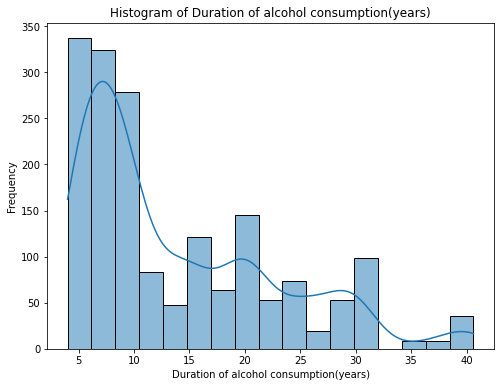

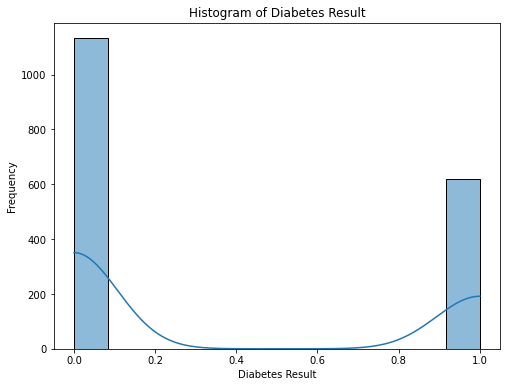

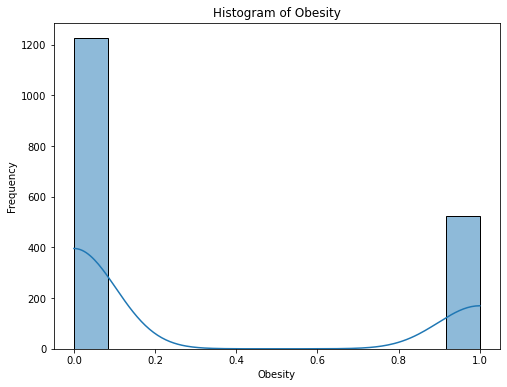

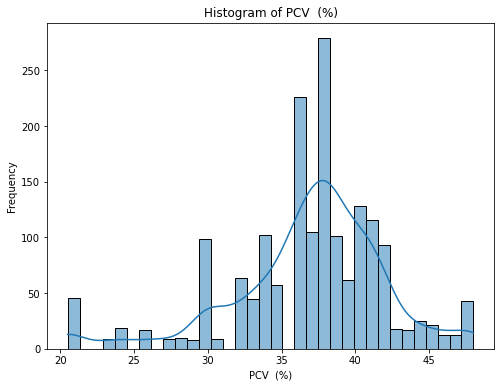

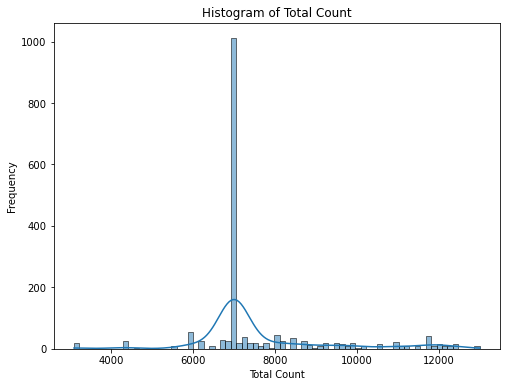

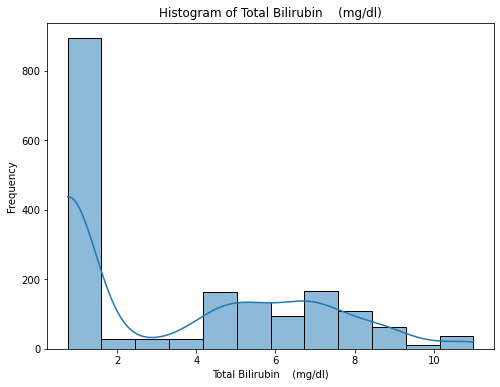

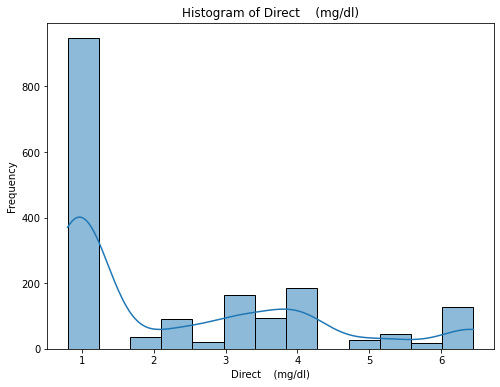

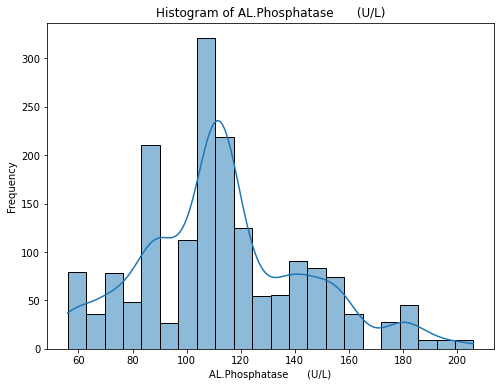

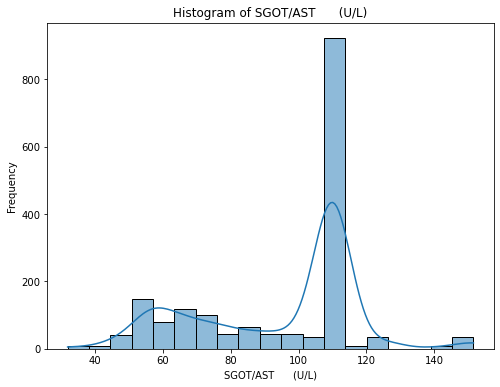

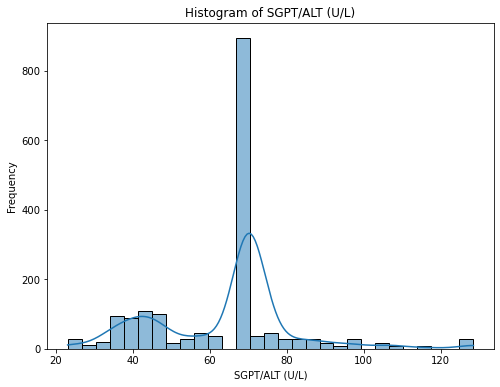

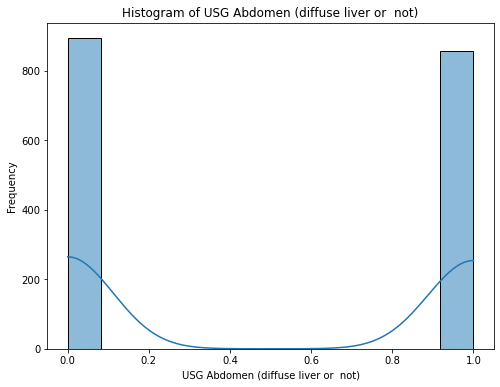

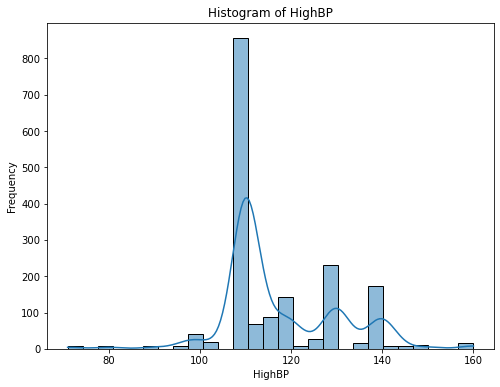

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns
numeric_columns = fewdata.select_dtypes(include=['int32', 'int64', 'float64'])

# Plot histograms separately
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=numeric_columns, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


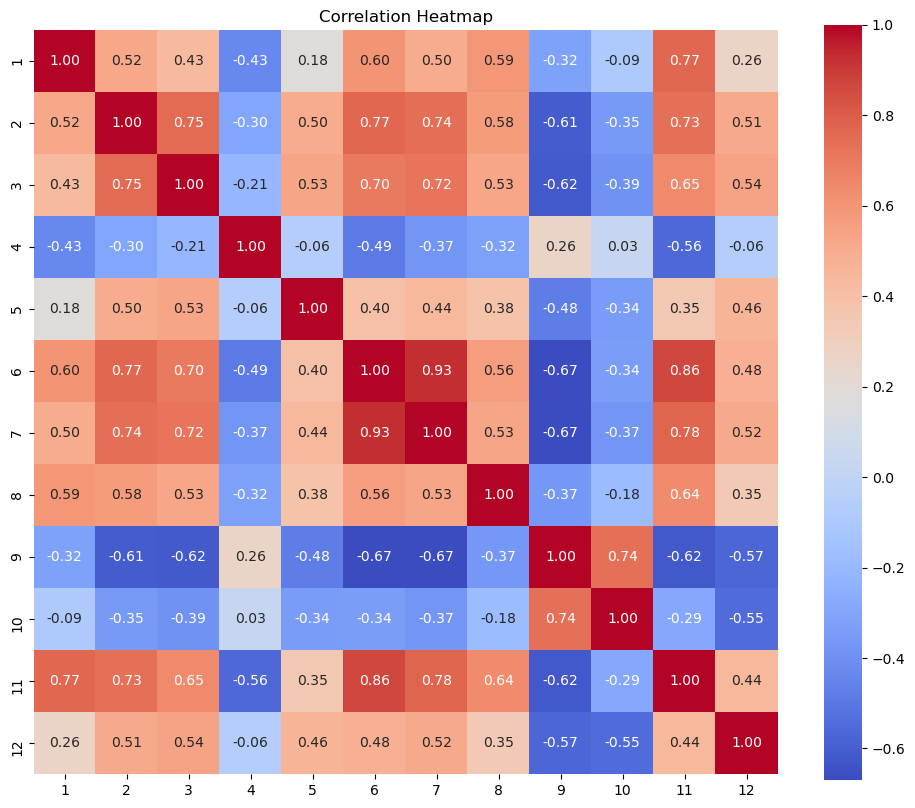

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_samples = 100
num_features = 12

df =fewdata
# Compute correlation matrix
corr_matrix = np.corrcoef(df, rowvar=False)

# Create heatmap
plt.figure(figsize=(12, 10), dpi=100)  # Increase the figure size and resolution
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.xticks(np.arange(num_features) + 0.5, np.arange(num_features) + 1)
plt.yticks(np.arange(num_features) + 0.5, np.arange(num_features) + 1)
plt.show()


# Pair plot and correllation matrix of features

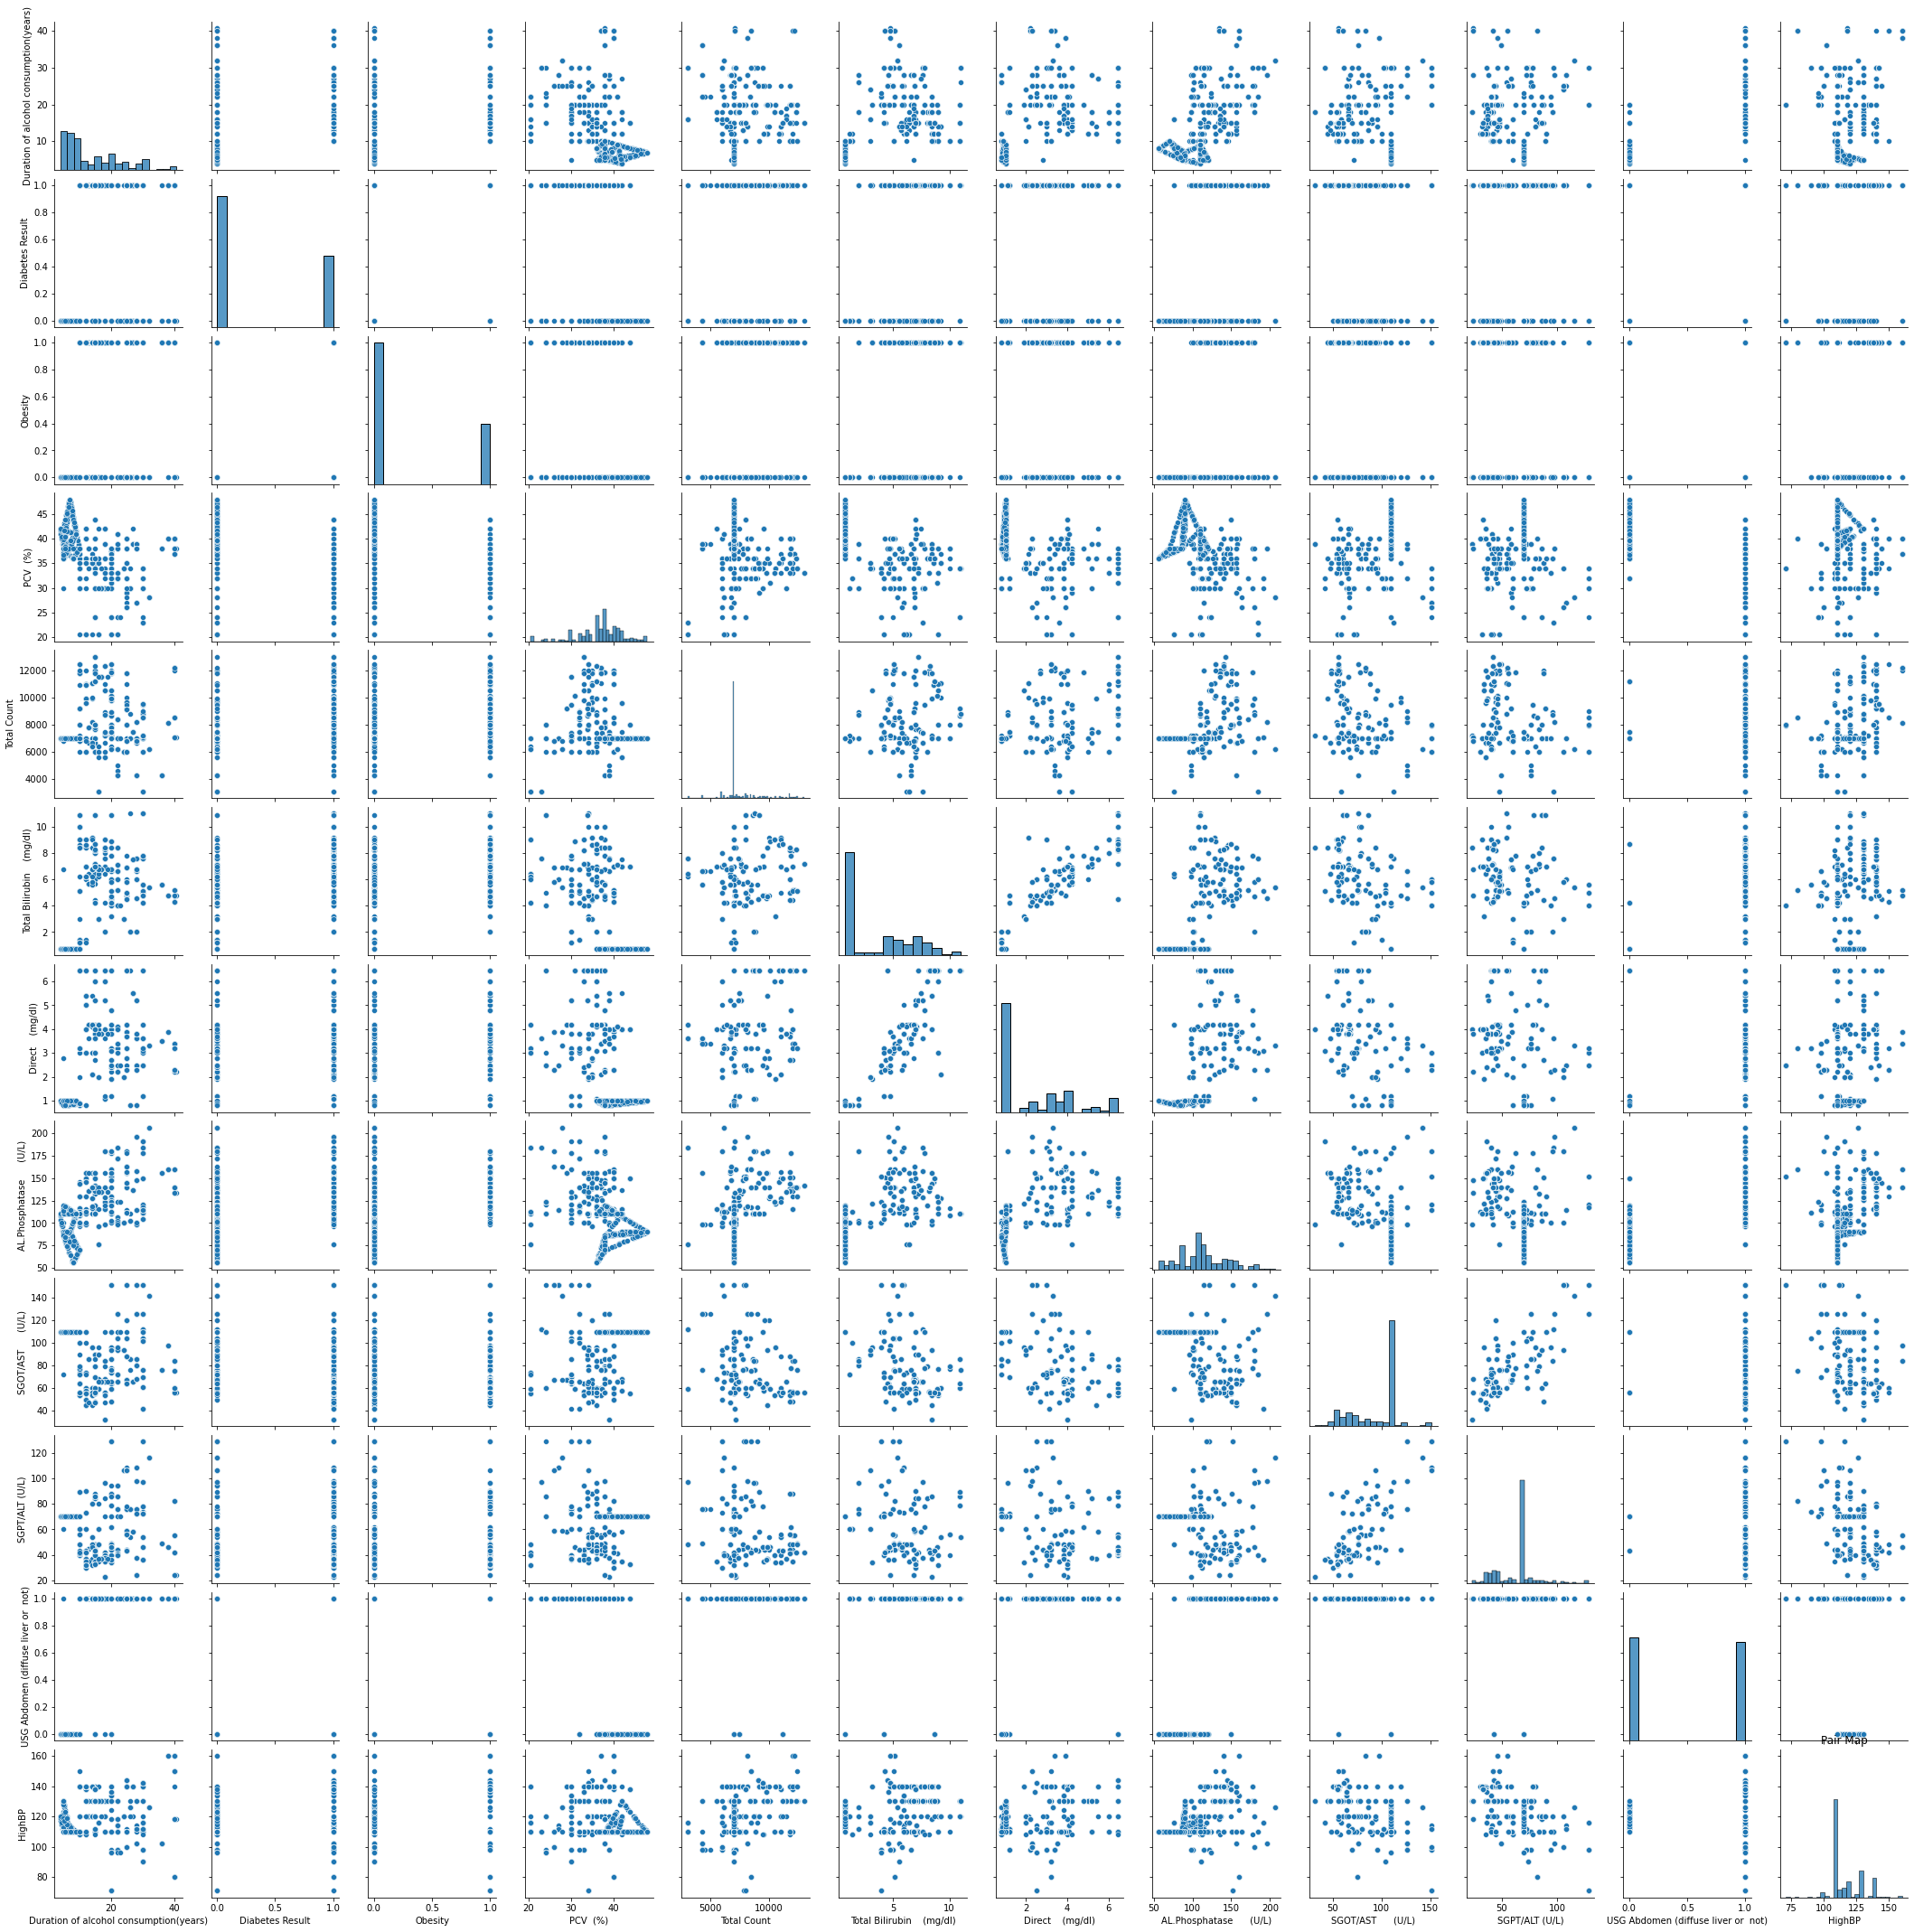

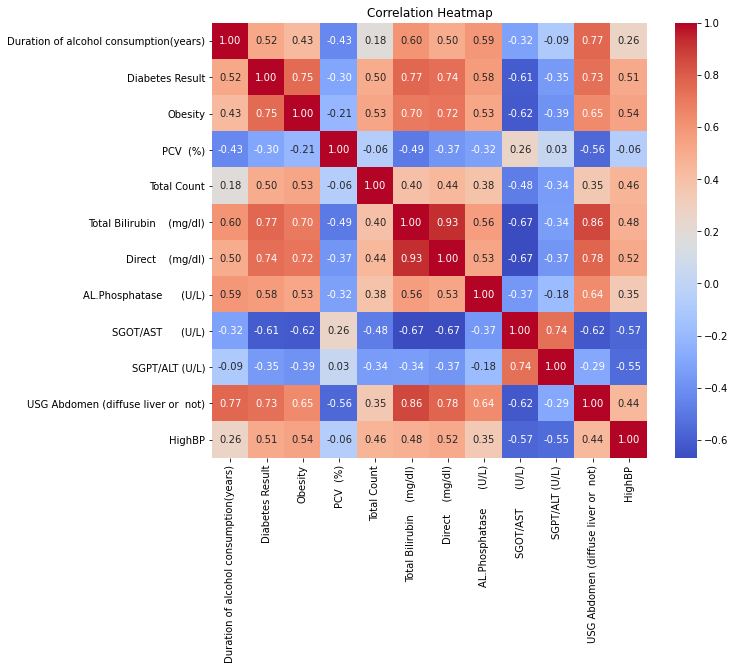

In [ ]:

# Read the DataFrame (replace 'df' with the actual variable name of your DataFrame)

# Pair map
sns.pairplot(df)
plt.title('Pair Map')
plt.show()

# Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


# Now we are doing train test split ,scaling and plotting confusion matrix for differnt classifiers

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and evaluating LogisticRegression
Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]

Predictions are :
[0 0 1]


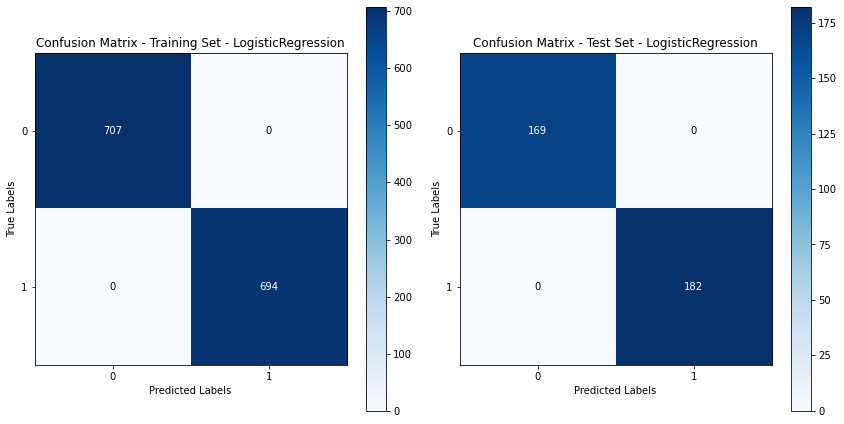

---------------------------------------
Training and evaluating DecisionTreeClassifier
Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]

Predictions are :
[1 1 1]


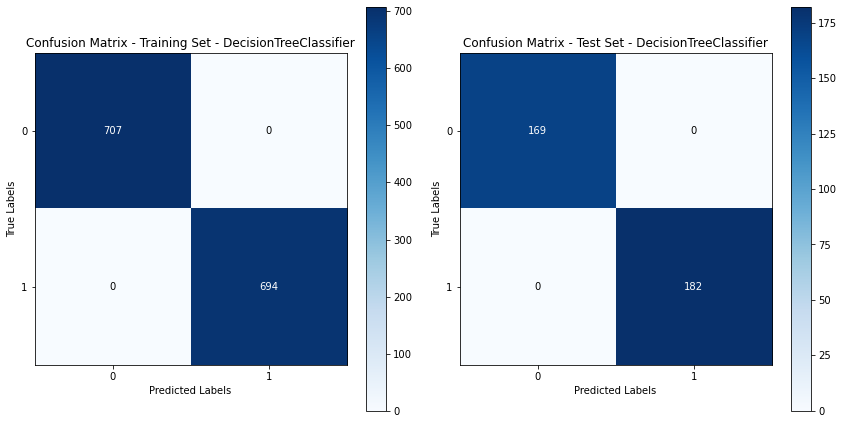

---------------------------------------
Training and evaluating SVC
Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]

Predictions are :
[0 0 1]


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


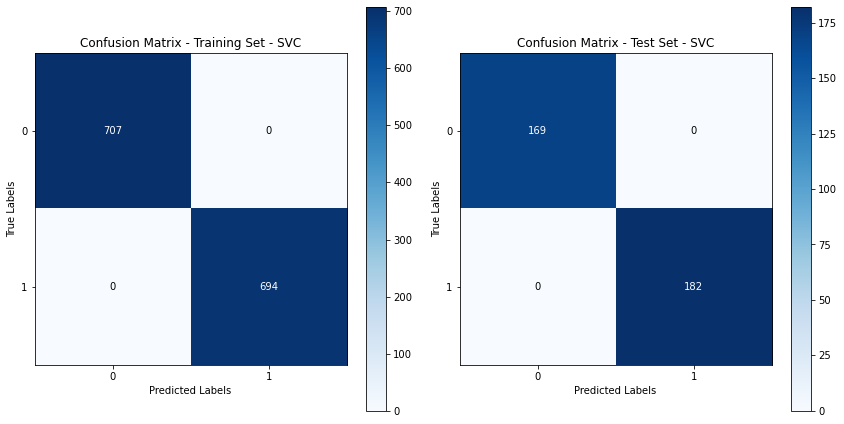

---------------------------------------
Training and evaluating RandomForestClassifier


<ipython-input-59-0cddf9cfbe68>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_scaled, y_train)


Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]

Predictions are :
[1 1 1]


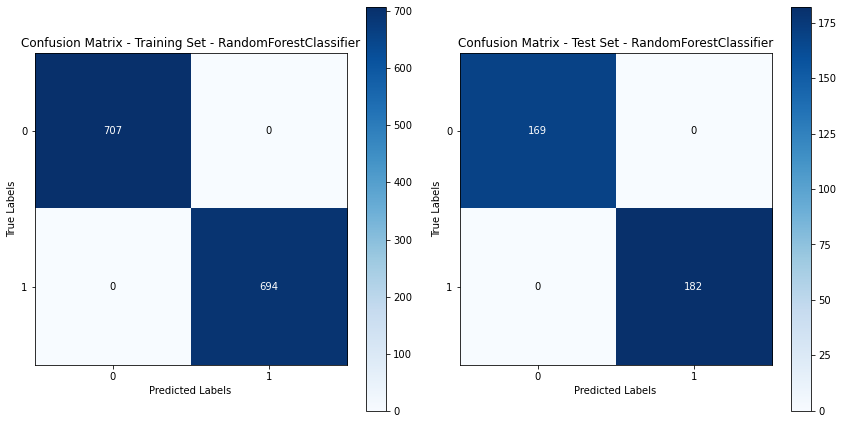

---------------------------------------
Training and evaluating KNeighborsClassifier
Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]

Predictions are :
[0 0 1]


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


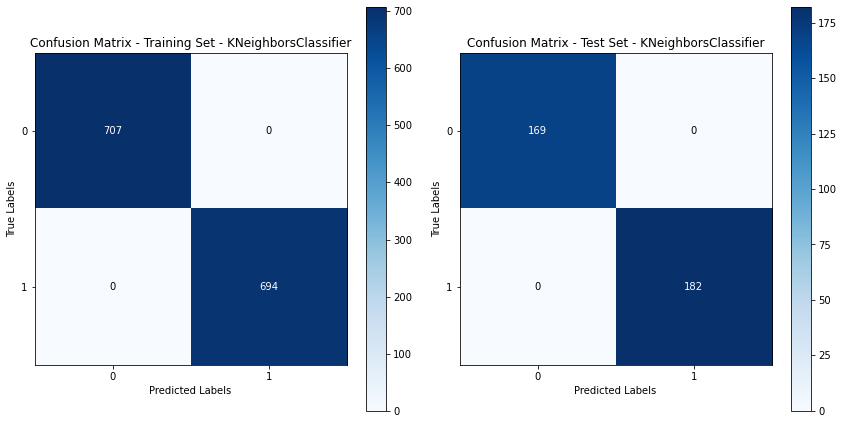

---------------------------------------
Training and evaluating XGBClassifier
Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]

Predictions are :
[1 1 1]


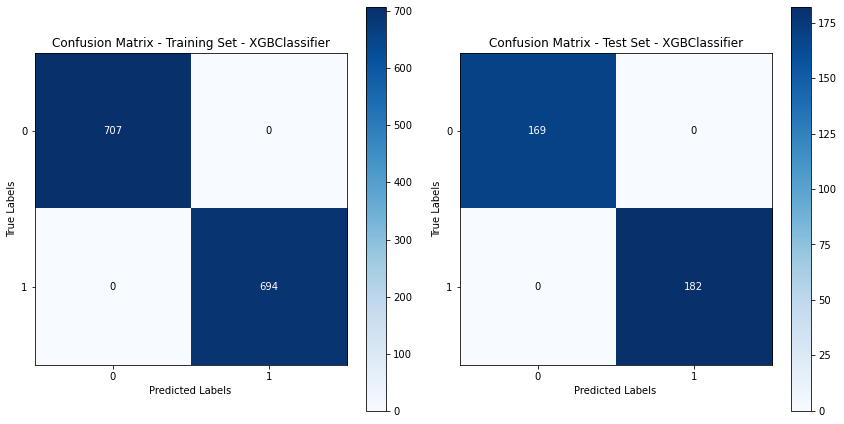

---------------------------------------


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(fewdata, y_resampled, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    XGBClassifier()  # Add XGBoost classifier
]

# Iterate over the classifiers and train/evaluate them
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print("Training and evaluating", classifier_name)

    # Train the classifier
    classifier.fit(X_train_scaled, y_train)

    # Make predictions for both training and test sets
    y_train_pred = classifier.predict(X_train_scaled)
    y_test_pred = classifier.predict(X_test_scaled)

    # Generate confusion matrices for both training and test sets
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    gag=scaler.fit_transform([[8,0,0,36,7000,0.3,1,56,110,70,0,110],[9,0,0,41,7000,0.6,1,110,110,70,0,110],[20,0,0,32,7500,4.2,1.2,120,110,70,0,110]])

    # Print the confusion matrices
    print("Confusion Matrix - Training Set:")
    print(train_cm)
    print("\nConfusion Matrix - Test Set:")
    print(test_cm)
    print("\nPredictions are :")
    print(classifier.predict(gag))


    # Visualize the confusion matrices
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(train_cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - Training Set - " + classifier_name)
    plt.colorbar()
    classes = np.unique(y_train)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = train_cm.max() / 2
    for i in range(train_cm.shape[0]):
        for j in range(train_cm.shape[1]):
            plt.text(j, i, train_cm[i, j], ha="center", va="center",
                     color="white" if train_cm[i, j] > thresh else "black")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    plt.subplot(1, 2, 2)
    plt.imshow(test_cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - Test Set - " + classifier_name)
    plt.colorbar()
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = test_cm.max() / 2
    for i in range(test_cm.shape[0]):
        for j in range(test_cm.shape[1]):
            plt.text(j, i, test_cm[i, j], ha="center", va="center",
                     color="white" if test_cm[i, j] > thresh else "black")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    plt.tight_layout()
    plt.show()

    print("---------------------------------------")


# Hyperparameter tuning for Logistic regression, SVC and KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


X = fewdata
y = y_resampled

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example 1: KNN Classifier
knn = KNeighborsClassifier()

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 13, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search on KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score for KNN
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

# Train KNN with the best parameters
knn_best = KNeighborsClassifier(**knn_best_params)
knn_best.fit(X_train_scaled, y_train)
knn_predictions_train = knn_best.predict(X_train_scaled)
knn_predictions_test = knn_best.predict(X_test_scaled)
knn_accuracy_train = accuracy_score(y_train, knn_predictions_train)
knn_accuracy_test = accuracy_score(y_test, knn_predictions_test)


# Example 2: SVC Classifier
svc = SVC()

# Define the parameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}

# Perform grid search on SVC
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5)
svc_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score for SVC
svc_best_params = svc_grid_search.best_params_
svc_best_score = svc_grid_search.best_score_

# Train SVC with the best parameters
svc_best = SVC(**svc_best_params)
svc_best.fit(X_train_scaled, y_train)
svc_predictions_train = svc_best.predict(X_train_scaled)
svc_predictions_test = svc_best.predict(X_test_scaled)
svc_accuracy_train = accuracy_score(y_train, svc_predictions_train)
svc_accuracy_test = accuracy_score(y_test, svc_predictions_test)


# Example 3: Logistic Regression Classifier
logreg = LogisticRegression()

# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Perform grid search on Logistic Regression
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score for Logistic Regression
logreg_best_params = logreg_grid_search.best_params_
logreg_best_score = logreg_grid_search.best_score_

# Train Logistic Regression with the best parameters
logreg_best = LogisticRegression(**logreg_best_params)
logreg_best.fit(X_train_scaled, y_train)
logreg_predictions_train = logreg_best.predict(X_train_scaled)
logreg_predictions_test = logreg_best.predict(X_test_scaled)
logreg_accuracy_train = accuracy_score(y_train, logreg_predictions_train)
logreg_accuracy_test = accuracy_score(y_test, logreg_predictions_test)


# Print the best parameters and scores for each classifier
print("KNN Best Parameters:", knn_best_params)
print("KNN Best Score:", knn_best_score)
print("KNN Accuracy - Training Set:", knn_accuracy_train)
print("KNN Accuracy - Testing Set:", knn_accuracy_test)
print("KNN Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, knn_predictions_train))
print("KNN Confusion Matrix - Testing Set:")
print(confusion_matrix(y_test, knn_predictions_test))
print()

print("SVC Best Parameters:", svc_best_params)
print("SVC Best Score:", svc_best_score)
print("SVC Accuracy - Training Set:", svc_accuracy_train)
print("SVC Accuracy - Testing Set:", svc_accuracy_test)
print("SVC Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, svc_predictions_train))
print("SVC Confusion Matrix - Testing Set:")
print(confusion_matrix(y_test, svc_predictions_test))
print()

print("Logistic Regression Best Parameters:", logreg_best_params)
print("Logistic Regression Best Score:", logreg_best_score)
print("Logistic Regression Accuracy - Training Set:", logreg_accuracy_train)
print("Logistic Regression Accuracy - Testing Set:", logreg_accuracy_test)
print("Logistic Regression Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, logreg_predictions_train))
print("Logistic Regression Confusion Matrix - Testing Set:")
print(confusion_matrix(y_test, logreg_predictions_test))



C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

KNN Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
KNN Best Score: 1.0
KNN Accuracy - Training Set: 1.0
KNN Accuracy - Testing Set: 1.0
KNN Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]
KNN Confusion Matrix - Testing Set:
[[169   0]
 [  0 182]]

SVC Best Parameters: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
SVC Best Score: 1.0
SVC Accuracy - Training Set: 1.0
SVC Accuracy - Testing Set: 1.0
SVC Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]
SVC Confusion Matrix - Testing Set:
[[169   0]
 [  0 182]]

Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best Score: 1.0
Logistic Regression Accuracy - Training Set: 1.0
Logistic Regression Accuracy - Testing Set: 1.0
Logistic Regression Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]
Logistic Regression Confusion Matrix - Testing Set:
[[169   0]
 [  0 182]]


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------

In [ ]:
knn_best.predict(scaler.transform(gag))


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 1, 1])

In [ ]:
svc_best.predict(scaler.transform(gag))

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 1, 1])

In [ ]:
logreg_best.predict(scaler.transform(gag))

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 1, 1])

# Without hyperparameters tuning is best option

#

# Lets make a model of KNN

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix - Training Set:
[[707   0]
 [  0 694]]

Confusion Matrix - Test Set:
[[169   0]
 [  0 182]]


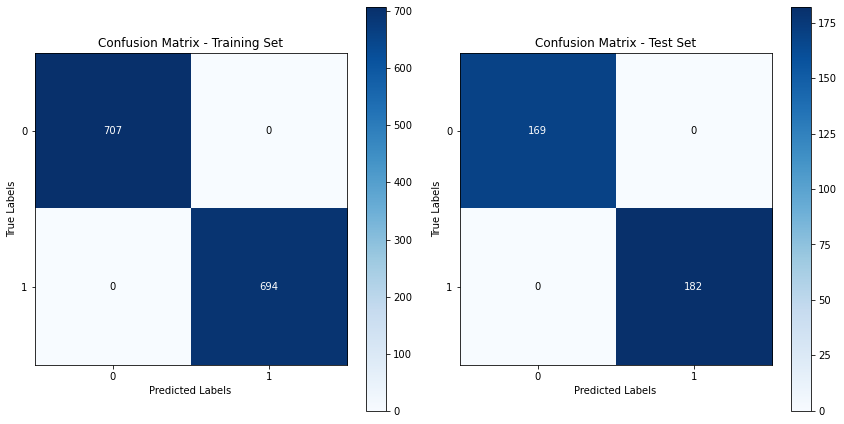

---------------------------------------
Predictions for new samples:
Sample: [-0.65225996 -0.732246   -0.66211657 -0.1744509  -0.39561401 -1.01942264
 -0.76538006 -1.90122052  0.63213374  0.30314816 -0.97671638 -0.57578716]
Prediction: 0
---------------------------------------
Sample: [-0.53879048 -0.732246   -0.66211657  0.78864402 -0.39561401 -0.92245781
 -0.76538006 -0.12145939  0.63213374  0.30314816 -0.97671638 -0.57578716]
Prediction: 0
---------------------------------------
Sample: [ 0.70937384 -0.732246   -0.66211657 -0.94492683 -0.09390737  0.24112013
 -0.6527565   0.20812601  0.63213374  0.30314816 -0.97671638 -0.57578716]
Prediction: 1
---------------------------------------


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(fewdata, y_resampled, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions for both training and test sets
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Generate confusion matrices for both training and test sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrices
print("Confusion Matrix - Training Set:")
print(train_cm)
print("\nConfusion Matrix - Test Set:")
print(test_cm)

# Visualize the confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(train_cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Training Set")
plt.colorbar()
classes = np.unique(y_train)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = train_cm.max() / 2
for i in range(train_cm.shape[0]):
    for j in range(train_cm.shape[1]):
        plt.text(j, i, train_cm[i, j], ha="center", va="center",
                 color="white" if train_cm[i, j] > thresh else "black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
plt.imshow(test_cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.colorbar()
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = test_cm.max() / 2
for i in range(test_cm.shape[0]):
    for j in range(test_cm.shape[1]):
        plt.text(j, i, test_cm[i, j], ha="center", va="center",
                 color="white" if test_cm[i, j] > thresh else "black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

print("---------------------------------------")

# Predict with KNN on new samples
new_samples = scaler.transform([[8, 0, 0, 36, 7000, 0.3, 1, 56, 110, 70, 0, 110],
                                [9, 0, 0, 41, 7000, 0.6, 1, 110, 110, 70, 0, 110],
                                [20, 0, 0, 32, 7500, 4.2, 1.2, 120, 110, 70, 0, 110]])
predictions = knn.predict(new_samples)

print("Predictions for new samples:")
for sample, prediction in zip(new_samples, predictions):
    print("Sample:", sample)
    print("Prediction:", prediction)
    print("---------------------------------------")


# Saving it as pickel file

In [ ]:
import pickle
pickle.dump(knn,open('knn_model.pkl','wb'))

In [ ]:
import pickle

# Save the StandardScaler as a pickle file
pickle.dump(scaler, open("scaler.pkl", "wb"))


# We are done Here !!!